In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import pandas as pd
import cv2
from extra_functions import cluster_gen

In [2]:
df = pd.read_csv('./data/moonson_timur/1991.csv', delimiter=',', header=0)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df)
    print('\n\n\n\nJumlah data : ',len(df))

     Posisi_LS   Posisi_BT  Yellowfin  Bigeye  Albacore
0   -13.666667  109.400000          5       5         2
1   -10.083333  115.966667          0       4         0
2   -11.266667  109.950000          1       0         0
3   -14.216667  109.416667          1       1         1
4    -0.433333  119.500000          1       1         0
5   -13.583333  109.916667          0       4         6
6   -14.850000  109.833333          0       1         0
7   -13.300000  110.316667          2       3         4
8    -0.016667  118.850000          4       1         0
9   -13.833333  110.533333          1       2         0
10   -0.083333  118.933333          2       0         0
11  -12.983333  110.983333          0       0         0
12   -9.916667  114.666667          1       2         0
13  -10.516667  113.650000          0       2         0
14  -10.833333  114.700000          3       0         0
15  -12.233333  116.800000          1       2         8
16  -12.700000  115.233333          0       3   

In [3]:
# Generate some clusters!
# n_clusters = 50
# clusters_x, clusters_y = cluster_gen(n_clusters)

# # Convert to a single dataset in OpenCV format
# data = np.float32((np.concatenate(clusters_x), np.concatenate(clusters_y))).transpose()

data=df

X = StandardScaler().fit_transform(data)

# Define max_distance (eps parameter in DBSCAN())
db = DBSCAN(eps=2, min_samples=5).fit(data)

# Extract a mask of core cluster members
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Extract labels (-1 is used for outliers)
labels = db.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
unique_labels = set(labels)
n_noise_ = list(labels).count(-1)

/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [4]:
print('Estimated number of clusters: %d' % n_clusters)
print('Total Data : ', len(data))
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 12
Total Data :  929
Estimated number of noise points: 253
Silhouette Coefficient: -0.170


Text(0.5, 1.0, 'Original Data')

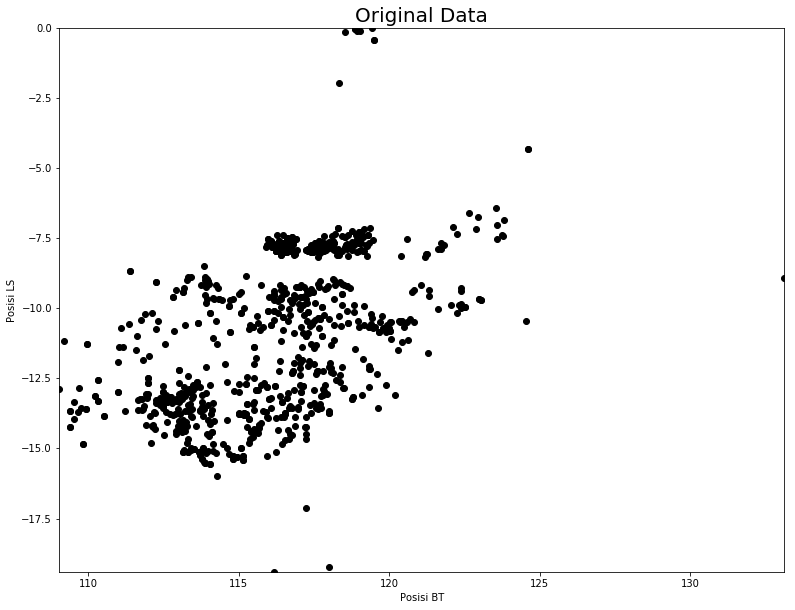

In [5]:
%matplotlib inline
# Plot up the results!
min_x = np.min(data['Posisi_BT'])
max_x = np.max(data['Posisi_BT'])
min_y = np.min(data['Posisi_LS'])
max_y = np.max(data['Posisi_LS'])

fig = plt.figure(figsize=(13,10))
plt.plot(data['Posisi_BT'], data['Posisi_LS'], 'ko')
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)
plt.ylabel('Posisi LS')
plt.xlabel('Posisi BT')
plt.title('Original Data', fontsize = 20)

<IPython.core.display.Javascript object>


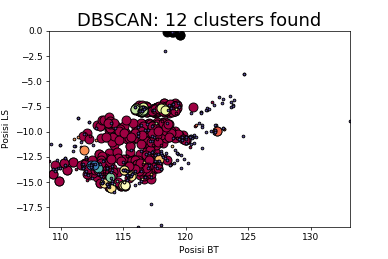


      Posisi_LS   Posisi_BT  Yellowfin  Bigeye  Albacore
1   -10.083333  115.966667          0       4         0
3   -14.216667  109.416667          1       1         1
6   -14.850000  109.833333          0       1         0
9   -13.833333  110.533333          1       2         0
11  -12.983333  110.983333          0       0         0
12   -9.916667  114.666667          1       2         0
13  -10.516667  113.650000          0       2         0
14  -10.833333  114.700000          3       0         0
16  -12.700000  115.233333          0       3         1
17  -12.966667  117.066667          1       2         0
18  -11.366667  115.500000          2       3         0
19  -12.766667  117.133333          1       2         0
20  -10.666667  115.466667          2       2         0
21  -11.850000  117.116667          3       2         0
22  -10.166667  115.083333          0       4         0
23  -10.983333  117.233333          1       4         0
24  -10.550000  117.433333          2       5 

In [7]:
%matplotlib notebook
# plt.subplt(122)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == 1:
        # block used noise.
        col = [0, 0, 0, 1]
        
    class_member_mask = (labels == k)

    xy = data[class_member_mask & core_samples_mask]
    plt.plot(xy['Posisi_BT'], xy['Posisi_LS'], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10)
    print('\n', xy,'\nMember of Cluster : ', len(xy))

    xy = data[class_member_mask & ~core_samples_mask]
    plt.plot(xy['Posisi_BT'], xy['Posisi_LS'], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=3)
    
# Plot up the results!
# min_x = np.min(data['Posisi_BT'])
# max_x = np.max(data['Posisi_BT'])
# min_y = np.min(data['Posisi_LS'])
# max_y = np.max(data['Posisi_LS'])
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)
plt.ylabel('Posisi LS')
plt.xlabel('Posisi BT')
plt.title('DBSCAN: %d clusters found' % n_clusters, fontsize = 20)
fig.tight_layout()
plt.show()